In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Constants (as you defined them)
g    = 9.8
c_d  = 0.45
rho  = 1
area = 1.26 * 10**-3
mass = 2.7 * 10**-3
# gamma = 0.5 * (1/mass) * rho * area * c_d
gamma = 0.01

def drag(v):
    return -gamma * v**2 + g  # Corrected the sign here

def adaptive_drag(f, t0:float, tN:float, h_initial:float, eps=1e-3, h_min=1e-4, h_max=1.0) -> tuple:
    t = [t0]
    v = [0]  # Initial condition v(t0) = 0
    y = [0]  # Initial condition y(t0) = 0
    h = h_initial

    while t[-1] < tN:
        v_current = v[-1]
        t_current = t[-1]

        # Midpoint Rule (2nd order RK)
        k1 = f(v_current)
        k2 = f(v_current + h/2 * k1)
        v_next = v_current + h * k2

        # Error Estimation (using embedded Euler step)
        v_euler = v_current + h * k1  # Simple Euler step
        error = abs(v_next - v_euler)

        # Step Size Adjustment
        if error < eps:
            t.append(t_current + h)
            v.append(v_next)
            y.append(y[-1] + v_next*h) #updating y position
            h = min(h * 1.2, h_max)  # Increase step size slightly
        else:
            h = max(h * 0.5, h_min)  # Decrease step size

        # if h < h_min:
        #     raise ValueError("Step size too small. Consider reducing tolerance or increasing h_min.")

    return np.array(t), np.array(y), np.array(v)

In [2]:
# Example usage:
t0 = 0.00
tN = 0.44
h_initial = 0.1 #initial step size
t, y, v = adaptive_drag(drag, t0, tN, h_initial)

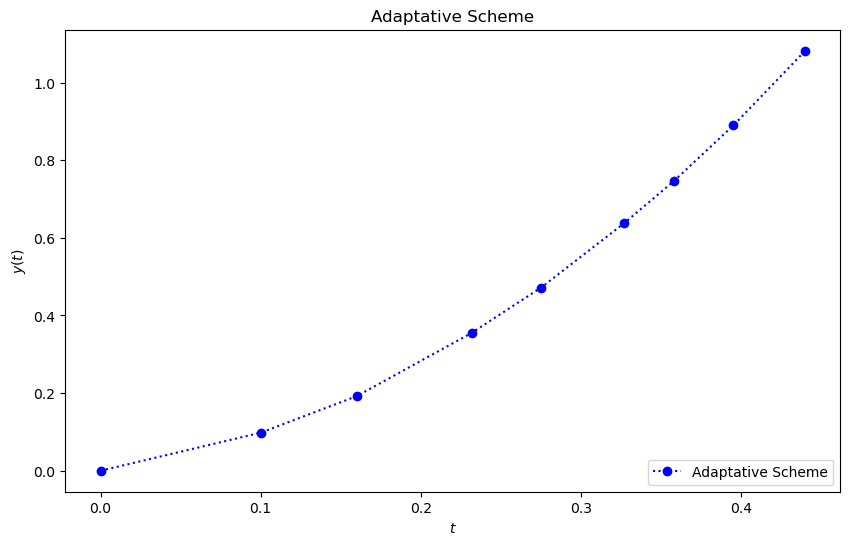

In [3]:
plt.figure(figsize=(10,6))
plt.plot(t,y,':bo' , linewidth=1.5,label=r'Adaptative Scheme')
plt.ylabel(r'$y(t)$')
plt.xlabel(r'$t$')
plt.title(r'Adaptative Scheme')
plt.legend(loc=4)
plt.show()

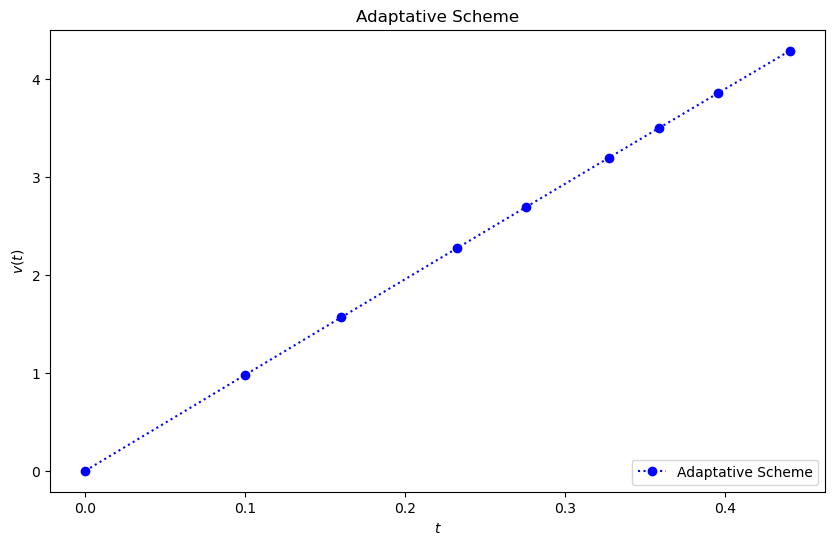

In [4]:
# Plot the solution
plt.figure(figsize=(10,6))
plt.plot(t,v,':bo' , linewidth=1.5,label=r'Adaptative Scheme')
plt.ylabel(r'$v(t)$')
plt.xlabel(r'$t$')
plt.title(r'Adaptative Scheme')
plt.legend(loc=4)
plt.show()